# Cumulative Eigenvector Clustering

What is the impact of each eigenvector to the normalized spectral clustering algorithm? While incrementing $k$, the number of clusters, how do the clusterings change?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from normalized_spectral_clustering_shi import laplacian_matrix, similarity_matrix
from Kmeans import kmeans
from matplotlib import cm
from tqdm import tqdm
from spectral_clustering import spectral_clustering

## Data generation

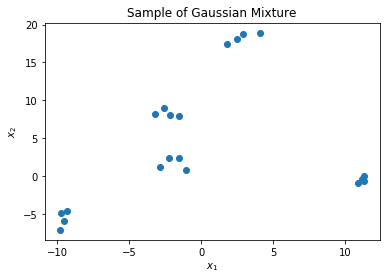

In [2]:
from datasets import gaussian_mixture

n_gaussians = 5
n_pts = 4
n = n_pts * n_gaussians
d = 2

data = gaussian_mixture(n_gaussians, n_pts, d, centroid_var=10)

data = data.T

plt.scatter(*data.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Sample of Gaussian Mixture")
plt.show()

## Extract and Visualize Eigenvectors

In [3]:
laplacian, degreeinv = laplacian_matrix(data)
dinvl = degreeinv @ laplacian
evals, evecs = u_first_k_evectors = sp.linalg.eigh(dinvl)

In [4]:
cmap = cm.get_cmap("tab20")
unif_colors = [cmap(intensity) for intensity in np.linspace(0, 1, n)]

The following plot shows eigenvalue growth rate.
1. If there are $n_{\text{gaussian}}$ clusters, are the first $n_{\text{gaussian}}$-many eigenvalues nearly zero?

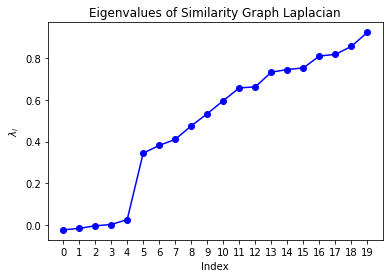

In [5]:
plt.plot(evals, "bo-")
plt.xlabel("Index")
plt.ylabel("$\lambda_i$")
plt.xticks(range(n))
plt.title("Eigenvalues of Similarity Graph Laplacian")
plt.show()

### Cumulative Clusters

Each subplot shows classification decisions using a certain number of eigenvectors of the normalized graph Laplacian. They are cumulative in the sense that plot $(i+1)$ includes all vectors used to cluster plot $(i)$, with an extra one.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:29<00:00,  4.50s/it]


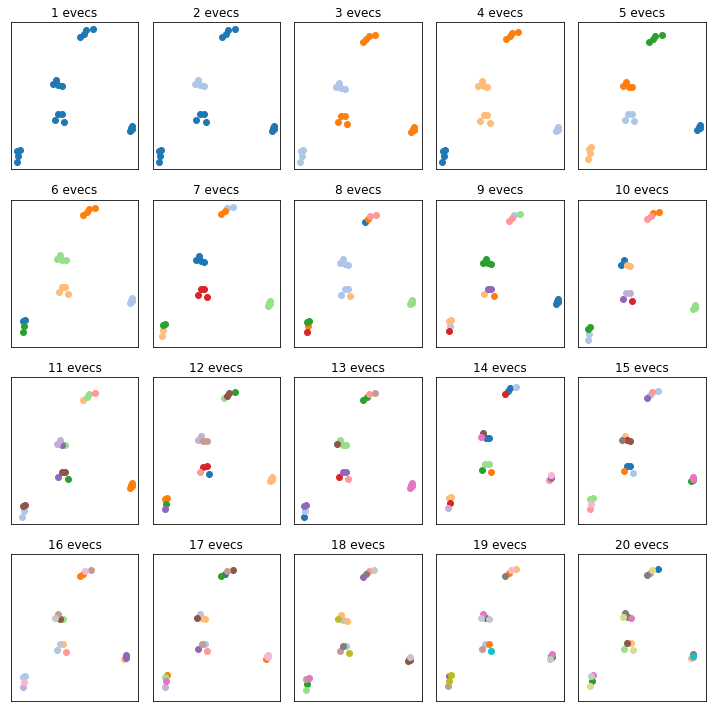

In [6]:
r = n_pts
c = n_gaussians
# r * c = N
for i in tqdm(range(1,n+1)):
    _, assns = kmeans(evecs[:, :i].T, i, iters=10000)
    data_clusters = [ data[assns == clss, :].T for clss in range(i) ]
    plt.subplot(r, c, i)
    plt.title(f"{i} evecs")
    plt.gca().set_xticks([], [])
    plt.gca().set_yticks([], [])
    
    for j, data_cluster in enumerate(data_clusters):
        plt.scatter(*data_cluster, color=unif_colors[j])
plt.gcf().set_size_inches(10, 10)
plt.tight_layout()
plt.savefig("Cumulative_Eigenvectors.png")
plt.show()

### Individual Eigenvectors

Each subplot shows the classification of points using only the *sign of the components of a partiular eigenvector*. 

Hypothesis: the $n$-th eigenvector is an approximate indicator of the $n$-th most refined cluster.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 54.64it/s]


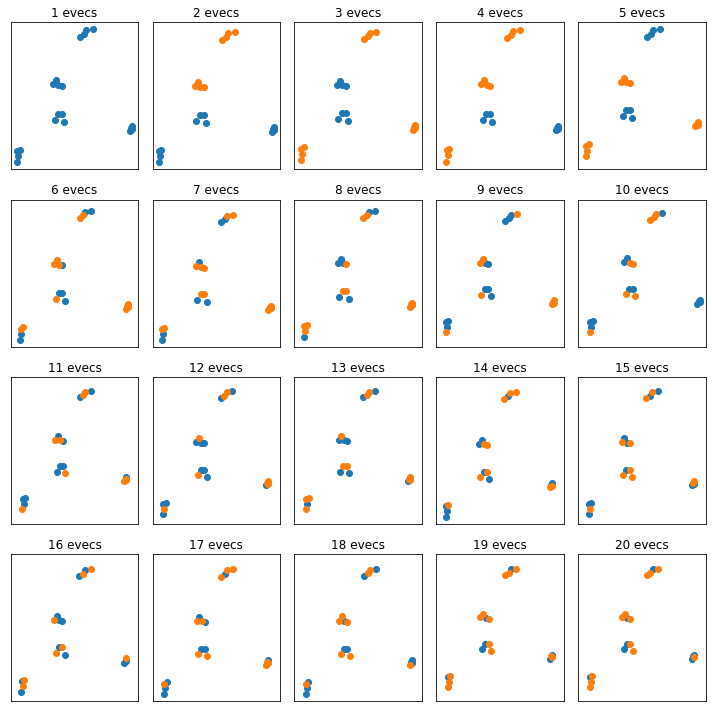

In [8]:
r = n_pts
c = n_gaussians
# r * c = N
for i in tqdm(range(0, n)):
    assns = (evecs[:, i] > 0)
    data_clusters = [ data[assns == clss, :].T for clss in [0, 1] ] # two class case
    
    plt.subplot(r, c, i+1)
    plt.title(f"{i+1} evecs")
    plt.gca().set_xticks([], [])
    plt.gca().set_yticks([], [])
    
    for j, data_cluster in enumerate(data_clusters):
        plt.scatter(*data_cluster)
plt.gcf().set_size_inches(10, 10)
plt.tight_layout()
plt.savefig("Individual_Eigenvectors.png")
plt.show()